# Objective:

My aim is to develop a predictive model that accurately estimates beer consumption based on weather-related and possibly other environmental factors

# Problem Statement:
Use dataset - beer consumption. The goal is to be predicting beer consumption (measured in liters) based on various predictor variables, including temperature (median, min, max) and rainfall and Weekend(0/1).



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
beer_data = pd.read_csv("/Users/priyanshi/Desktop/ML/beer_consumption_data.csv")  # read csv data into a dataframe using pd.read_csv

beer_data.head(10) #head() prints top 5 rows in the data set

Data Temperatura Media (C) Temperatura Minima (C)  \
0  2015-01-01                  27,3                   23,9   
1  2015-01-02                 27,02                   24,5   
2  2015-01-03                 24,82                   22,4   
3  2015-01-04                 23,98                   21,5   
4  2015-01-05                 23,82                     21   
5  2015-01-06                 23,78                   20,1   
6  2015-01-07                    24                   19,5   
7  2015-01-08                  24,9                   19,5   
8  2015-01-09                  28,2                   21,9   
9  2015-01-10                 26,76                   22,1   

  Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
0                   32,5                 0              0.0   
1                   33,5                 0              0.0   
2                   29,9                 0              1.0   
3                   28,6               1,2              1.0   
4                   28,3                 0              0.0   
5                   30,5              12,2              0.0   
6                   33,7                 0              0.0   
7                   32,8              48,6              0.0   
8                     34               4,4              0.0   
9                   34,2                 0              1.0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900  
5                       28.218  
6                       29.732  
7                       28.397  
8                       24.886  
9                       37.937

In [3]:
# Print the total number of rows and columns
print("Total number of rows:", beer_data.shape[0])
print("Total number of columns:", beer_data.shape[1])

# Show the first few rows in the dataset
print("\nFirst few rows in the dataset:")
beer_data.head()

Total number of rows: 941
Total number of columns: 7

First few rows in the dataset:


Data Temperatura Media (C) Temperatura Minima (C)  \
0  2015-01-01                  27,3                   23,9   
1  2015-01-02                 27,02                   24,5   
2  2015-01-03                 24,82                   22,4   
3  2015-01-04                 23,98                   21,5   
4  2015-01-05                 23,82                     21   

  Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
0                   32,5                 0              0.0   
1                   33,5                 0              0.0   
2                   29,9                 0              1.0   
3                   28,6               1,2              1.0   
4                   28,3                 0              0.0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900

In [4]:
beer_data.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

As we see that the column names are in different language we can rename them by using the following command or use 

df=df.remane(columns={'X':'xxx'})

In [5]:
beer_data.columns = ["Date", "Temperature_Median", "Temperature_Min", "Temperature_Max", "Rainfall", "Weekend", "Consumption_litres"]

beer_data.head(10) #head() prints top 5 rows in the data set

Date Temperature_Median Temperature_Min Temperature_Max Rainfall  \
0  2015-01-01               27,3            23,9            32,5        0   
1  2015-01-02              27,02            24,5            33,5        0   
2  2015-01-03              24,82            22,4            29,9        0   
3  2015-01-04              23,98            21,5            28,6      1,2   
4  2015-01-05              23,82              21            28,3        0   
5  2015-01-06              23,78            20,1            30,5     12,2   
6  2015-01-07                 24            19,5            33,7        0   
7  2015-01-08               24,9            19,5            32,8     48,6   
8  2015-01-09               28,2            21,9              34      4,4   
9  2015-01-10              26,76            22,1            34,2        0   

   Weekend  Consumption_litres  
0      0.0              25.461  
1      0.0              28.972  
2      1.0              30.814  
3      1.0              29.799  
4      0.0              28.900  
5      0.0              28.218  
6      0.0              29.732  
7      0.0              28.397  
8      0.0              24.886  
9      1.0              37.937

## Data Preparation and Cleaning:

Observation: temperature and rainfall values use commas instead of dots to denote decimals, indicating the need for conversion to float or double data types.

The date column is considered unnecessary for the analysis, and they are separating predictor variables from the response variable (consumption_litres).

In [6]:
beer_data['Temperature_Median'] = beer_data['Temperature_Median'].str.replace(',', '.').astype('float')
beer_data['Temperature_Min'] = beer_data['Temperature_Min'].str.replace(',', '.').astype('float')
beer_data['Temperature_Max'] = beer_data['Temperature_Max'].str.replace(',', '.').astype('float')
beer_data['Rainfall'] = beer_data['Rainfall'].str.replace(',', '.').astype('float')
beer_data.info()  # info() outputs total number of rows, number of columns and null values present in each of them.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                365 non-null    object 
 1   Temperature_Median  365 non-null    float64
 2   Temperature_Min     365 non-null    float64
 3   Temperature_Max     365 non-null    float64
 4   Rainfall            365 non-null    float64
 5   Weekend             365 non-null    float64
 6   Consumption_litres  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 51.6+ KB


In [7]:
beer_data.describe()

Temperature_Median  Temperature_Min  Temperature_Max    Rainfall  \
count          365.000000       365.000000       365.000000  365.000000   
mean            21.226356        17.461370        26.611507    5.196712   
std              3.180108         2.826185         4.317366   12.417844   
min             12.900000        10.600000        14.500000    0.000000   
25%             19.020000        15.300000        23.800000    0.000000   
50%             21.380000        17.900000        26.900000    0.000000   
75%             23.280000        19.600000        29.400000    3.200000   
max             28.860000        24.500000        36.500000   94.800000   

          Weekend  Consumption_litres  
count  365.000000          365.000000  
mean     0.284932           25.401367  
std      0.452001            4.399143  
min      0.000000           14.343000  
25%      0.000000           22.008000  
50%      0.000000           24.867000  
75%      1.000000           28.631000  
max      1.000000           37.937000

In [8]:
# Check for NaN or NA values
beer_data.isna().sum().any()

True

In [9]:
#drop Blank rows read from the input CSV and describe shows all #statistics 
beer_data = beer_data.dropna()
beer_data.isna().sum()

Date                  0
Temperature_Median    0
Temperature_Min       0
Temperature_Max       0
Rainfall              0
Weekend               0
Consumption_litres    0
dtype: int64

In [10]:
#creating a copy of df for simple linear regression
b_data=beer_data.copy()

In [11]:
#creating a copy of df for lasso and ridge regression
blr_data=beer_data.copy()

In [12]:
beer_data.value_counts()

Date        Temperature_Median  Temperature_Min  Temperature_Max  Rainfall  Weekend  Consumption_litres
2015-01-01  27.30               23.9             32.5             0.0       0.0      25.461                1
2015-09-09  18.82               15.8             22.9             58.0      0.0      16.977                1
2015-09-07  18.72               13.8             24.4             0.1       0.0      20.227                1
2015-09-06  16.48               13.3             19.9             0.0       1.0      23.566                1
2015-09-05  16.12               14.4             18.5             2.4       1.0      21.827                1
                                                                                                          ..
2015-05-01  17.34               13.4             22.0             0.0       0.0      17.939                1
2015-04-30  16.22               14.7             18.7             0.0       0.0      20.452                1
2015-04-29  18.66       

In [13]:
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                365 non-null    object 
 1   Temperature_Median  365 non-null    float64
 2   Temperature_Min     365 non-null    float64
 3   Temperature_Max     365 non-null    float64
 4   Rainfall            365 non-null    float64
 5   Weekend             365 non-null    float64
 6   Consumption_litres  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


In [14]:
beer_data.describe()

Temperature_Median  Temperature_Min  Temperature_Max    Rainfall  \
count          365.000000       365.000000       365.000000  365.000000   
mean            21.226356        17.461370        26.611507    5.196712   
std              3.180108         2.826185         4.317366   12.417844   
min             12.900000        10.600000        14.500000    0.000000   
25%             19.020000        15.300000        23.800000    0.000000   
50%             21.380000        17.900000        26.900000    0.000000   
75%             23.280000        19.600000        29.400000    3.200000   
max             28.860000        24.500000        36.500000   94.800000   

          Weekend  Consumption_litres  
count  365.000000          365.000000  
mean     0.284932           25.401367  
std      0.452001            4.399143  
min      0.000000           14.343000  
25%      0.000000           22.008000  
50%      0.000000           24.867000  
75%      1.000000           28.631000  
max      1.000000           37.937000

Primary analysis on data is done and now we have to separate the predictor and response variables(here it is consumption_litres).As date is of no use and consumption_litres is a response variable, we separate them from other variables to perform the analysis and training. Then save them in different data frames.

In [15]:
X = beer_data.drop(columns=['Date', 'Consumption_litres'])
y = beer_data['Consumption_litres']

# Exploratory Data Analysis (EDA):

A correlation matrix or heatmap is being used to analyze the collinearity between the predictor variables, with a focus on identifying highly correlated variables (like temperature features) to possibly remove them.

The Variance Inflation Factor (VIF) method is employed to eliminate features with high collinearity iteratively until all features have a VIF score below 5.

- Analyse with correlation matrix plot or heat map that gives the score of collinearity in range of 0 to 1.
- 1 being highly collinear and 0 being no mutual dependency.
- We can plot this using heatmap in seaborn library in python which we imported with name sns in the first step
- The argument to this heatmap will be X.corr() which gives the pairwise correlation of all columns of X in the dataframe

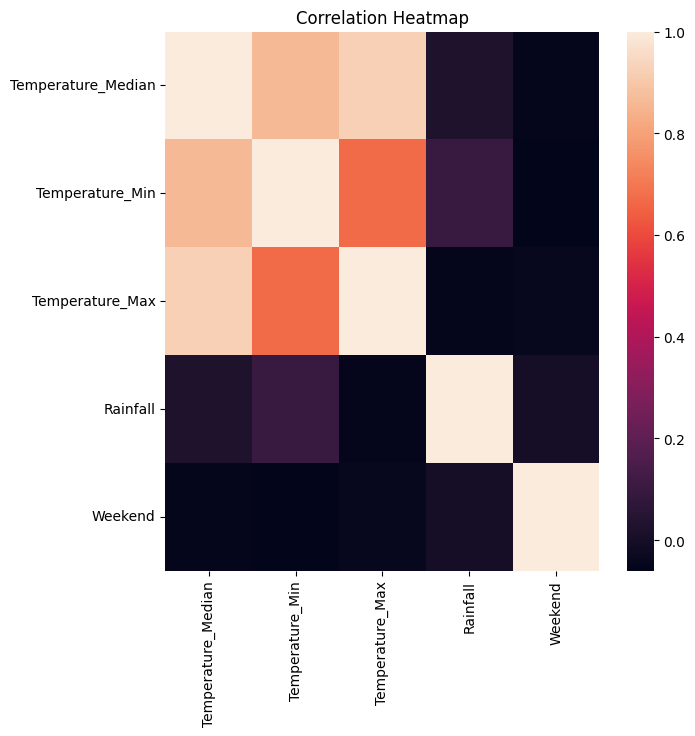

In [16]:
plt.figure(figsize=(7,7))
sns.heatmap(X.corr())
plt.title("Correlation Heatmap")
plt.show()

In the heat map here we can see that the Temperature_Median, Temperature_Min, Temperature_Max are highly collinear as their score is close to 1. Let us eliminate the unwanted features using VIF in next steps

In the heat map here we can see that the Temperature_Median, Temperature_Min, Temperature_Max are highly collinear as their score is close to 1. Let us eliminate the unwanted features using VIF in next steps


We first eliminate the feature with high score and re run VIF function to see if there is any change in the scores and repeat this process until all of the variables have a score <5



In [17]:
# vif = pd.DataFrame() #Let us show th VIF scores in a data frame
# vif[‘Features’] = X.columns
# vif[‘VIF Factor’] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #variance_inflation_factor calculates the scores #for each Feature
# vif

In [18]:
#If we write a function then we do not need to re run same set of lines all the time.After checking VIF scores we give the column name with high VIF score as an argument in this function and it is dropped form the dataframe
def check_vif_drop_column(X,column_name): 
 X = X.drop(columns=column_name) 
 vif = pd.DataFrame() 
 vif['Features'] = X.columns
 vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 return vif,X


In [19]:
vif1,X = check_vif_drop_column(X,'Temperature_Median')
vif1

Features  VIF Factor
0  Temperature_Min   62.903327
1  Temperature_Max   61.914485
2         Rainfall    1.215937
3          Weekend    1.374087

In [20]:
vif2,X = check_vif_drop_column(X,'Temperature_Min')
vif2

Features  VIF Factor
0  Temperature_Max    1.528790
1         Rainfall    1.163160
2          Weekend    1.373842

The VIF scores of Temperature_Min and Temperature_Max have decreased and lets eliminate Temperature_Min in this step as VIF is higher than Temperature_Max and recheck the scores



Now all the variables have VIF scores allowed range, we can move to model building

# Modeling Approach:

The notebook involves splitting the data into training and testing sets.

A linear regression model is being applied to predict beer consumption.

The performance of the model is evaluated using metrics such as Mean Squared Error (MSE) and R-squared (R²) and RMSE.

In [21]:
# def split_train_data(X,Y):
#  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
#  return(X_train, X_test, Y_train, Y_test)
# X_train, X_test, Y_train, Y_test = split_train_data(X,Y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Arguments will be the model used for training and train data.We can change this function according to the problem statement and requirement( remember to change it in argument too :P)
# def model_fit(model,X_train, Y_train):
#  model = LinearRegression() 
#  model.fit(X_train, Y_train)
#  return model
# lin_model = model_fit(LinearRegression,X_train, Y_train)

# OR

# Instantiate the linear regression model
lin_model = LinearRegression()

# Fit the model on the training data
lin_model.fit(X_train, y_train)

LinearRegression()

In [23]:
def scores_(model,X,Y):
 y_predict = model.predict(X)
 rmse = (np.sqrt(mean_squared_error(Y, y_predict)))
 r2 = r2_score(Y, y_predict)
 print('RMSE is {}'.format(rmse))
 print('R2 score is {}'.format(r2))


print("The model performance of training set")
scores_(lin_model,X_train,y_train)

print("--------------------------------------")

print("The model performance of testing set")
scores_(lin_model,X_test,y_test)

The model performance of training set
RMSE is 2.3046581745783827
R2 score is 0.710137427859404
--------------------------------------
The model performance of testing set
RMSE is 2.3801721406917133
R2 score is 0.7443386646797041


In [24]:
# Generate predictions on the testing data
y_pred = lin_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print RMSE
print("RMSE:", round(rmse, 3))

RMSE: 2.38


In [25]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 5.6652194193249725
R-squared (R2) Score: 0.7443386646797041


In [26]:
import matplotlib.pyplot as plt

# Check data lengths
print("Length of X_train:", len(X_train))
print("Length of Y_train:", len(y_train))

Length of X_train: 292
Length of Y_train: 292


In [27]:
print(X_train.shape)
print(y_train.shape)

(292, 3)
(292,)


Based on the output, X_train has a shape of (292, 3), meaning it has 3 features (columns) for each of the 292 samples. Y_train is a 1D array with 292 values, which corresponds to your labels.

To visualize the data with plt.scatter, you need to select one of the features (columns) from X_train. For example, if you want to plot the first feature, you can use X_train[:, 0].

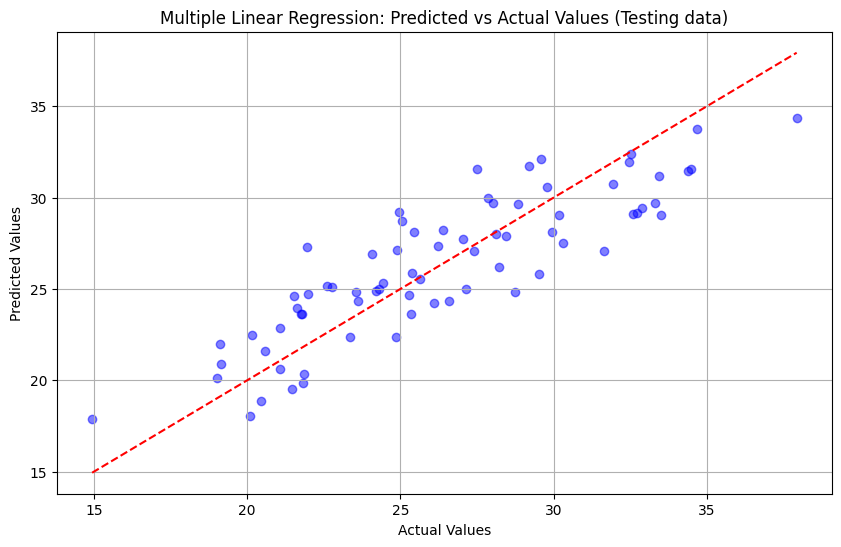

In [28]:
# Create scatter plot comparing predicted quantity to actual value
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Scatter plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Multiple Linear Regression: Predicted vs Actual Values (Testing data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

Since X includes multiple features, we cannot directly visualize the regression line in 2D space. Instead, the plot shows the relationship between predicted and actual consumption values, which helps evaluate the model's performance.

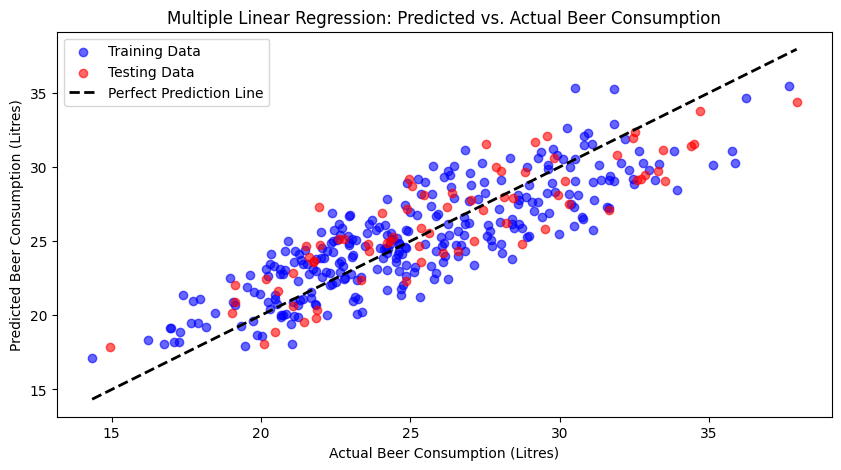

In [29]:
# Make predictions on training and testing data
y_train_pred = lin_model.predict(X_train)
y_test_pred = lin_model.predict(X_test)

# Plot the Training Data
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data', alpha=0.6)
plt.scatter(y_test, y_test_pred, color='red', label='Testing Data', alpha=0.6)

# Draw a line for perfect prediction
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linewidth=2, linestyle='--', label='Perfect Prediction Line')

# Add plot labels and title
plt.xlabel('Actual Beer Consumption (Litres)')
plt.ylabel('Predicted Beer Consumption (Litres)')
plt.title('Multiple Linear Regression: Predicted vs. Actual Beer Consumption')
plt.legend()

# Show the plot
plt.show()

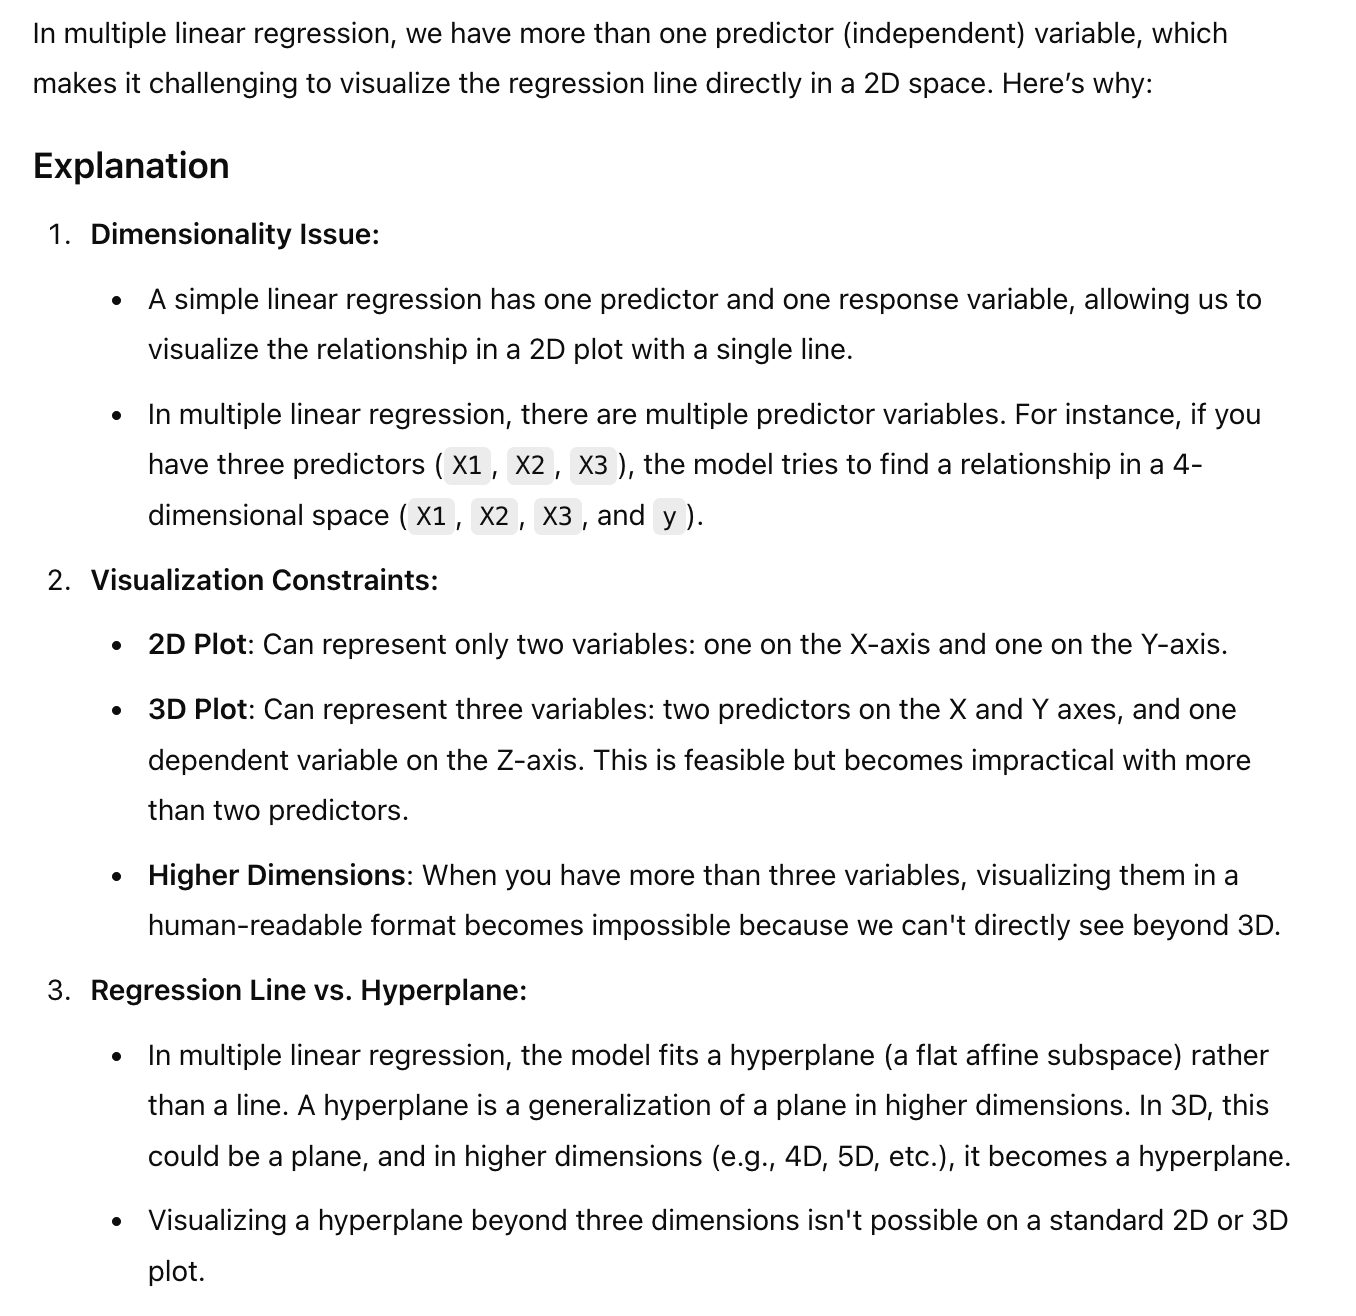

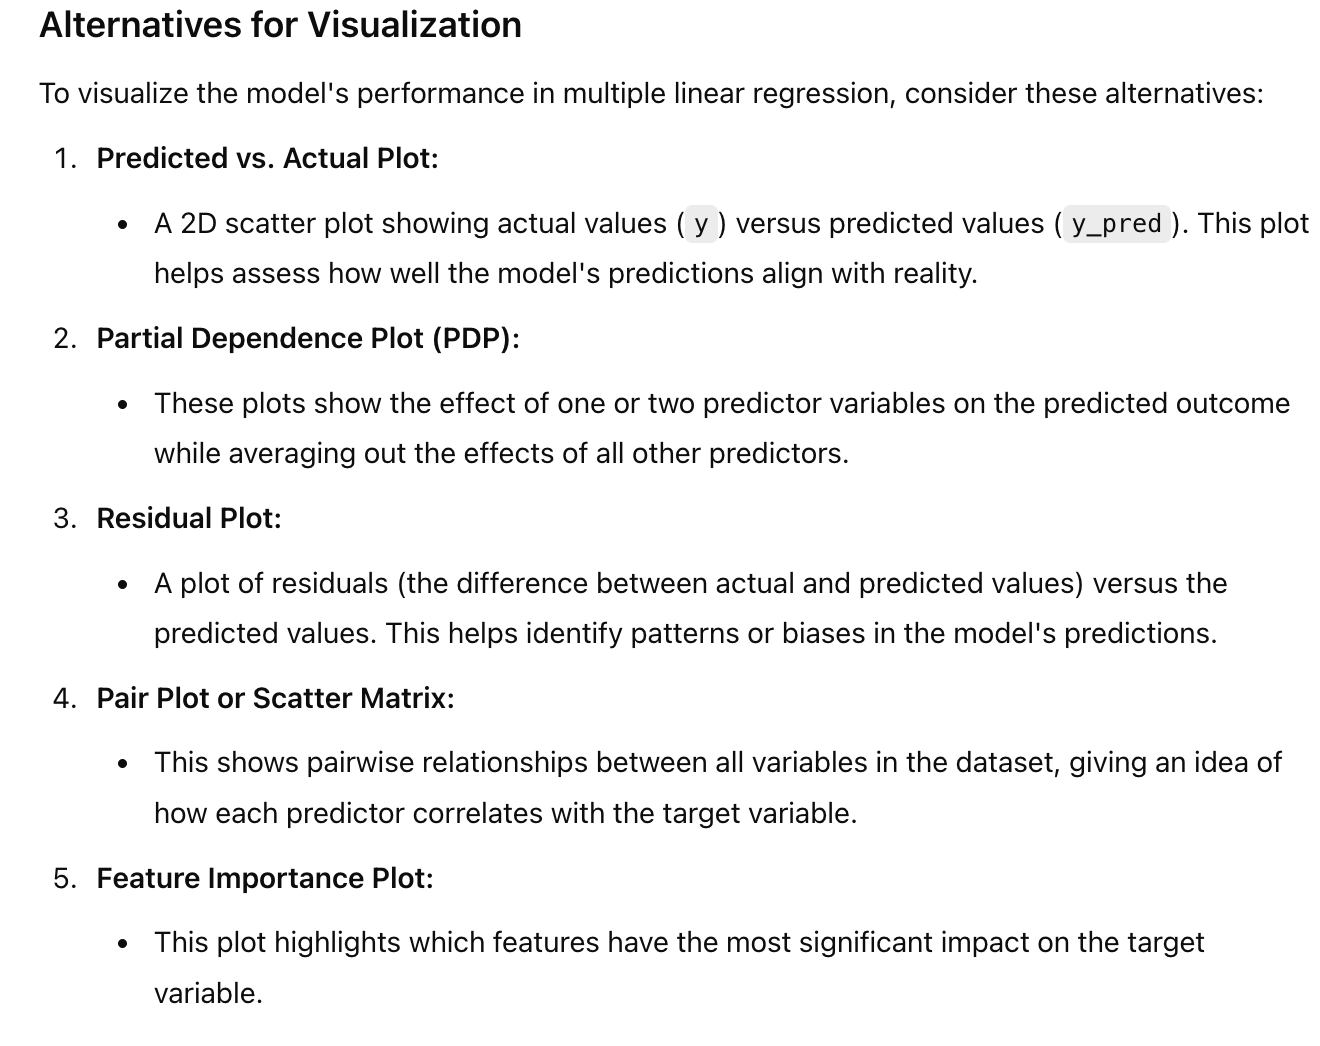

A Residual Plot helps you analyze the errors of your regression model. It shows the residuals (errors) on the Y-axis and the predicted values on the X-axis. If the model is good, the residuals should be randomly scattered around zero without any clear pattern.

residuals: Difference between the actual (y_test) and predicted values.

The plot shows the residuals against the predicted values to check for randomness. A well-fitted model should have no patterns or trends in the residual plot.

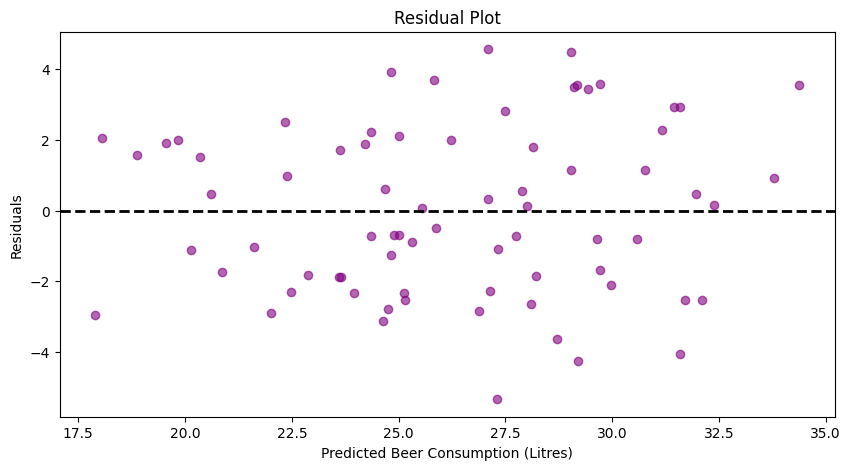

In [30]:
# Make predictions
y_pred = lin_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Predicted Beer Consumption (Litres)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

A Pair Plot (also known as a scatterplot matrix) allows you to visualize the pairwise relationships between multiple variables in your dataset. It helps you see correlations, distributions, and potential linear relationships between each pair of variables.

relevant_data: Contains all the predictor variables and the target variable (Consumption_litres).

sns.pairplot: Creates a matrix of scatter plots for all pairs of variables, giving insights into their pairwise relationships.

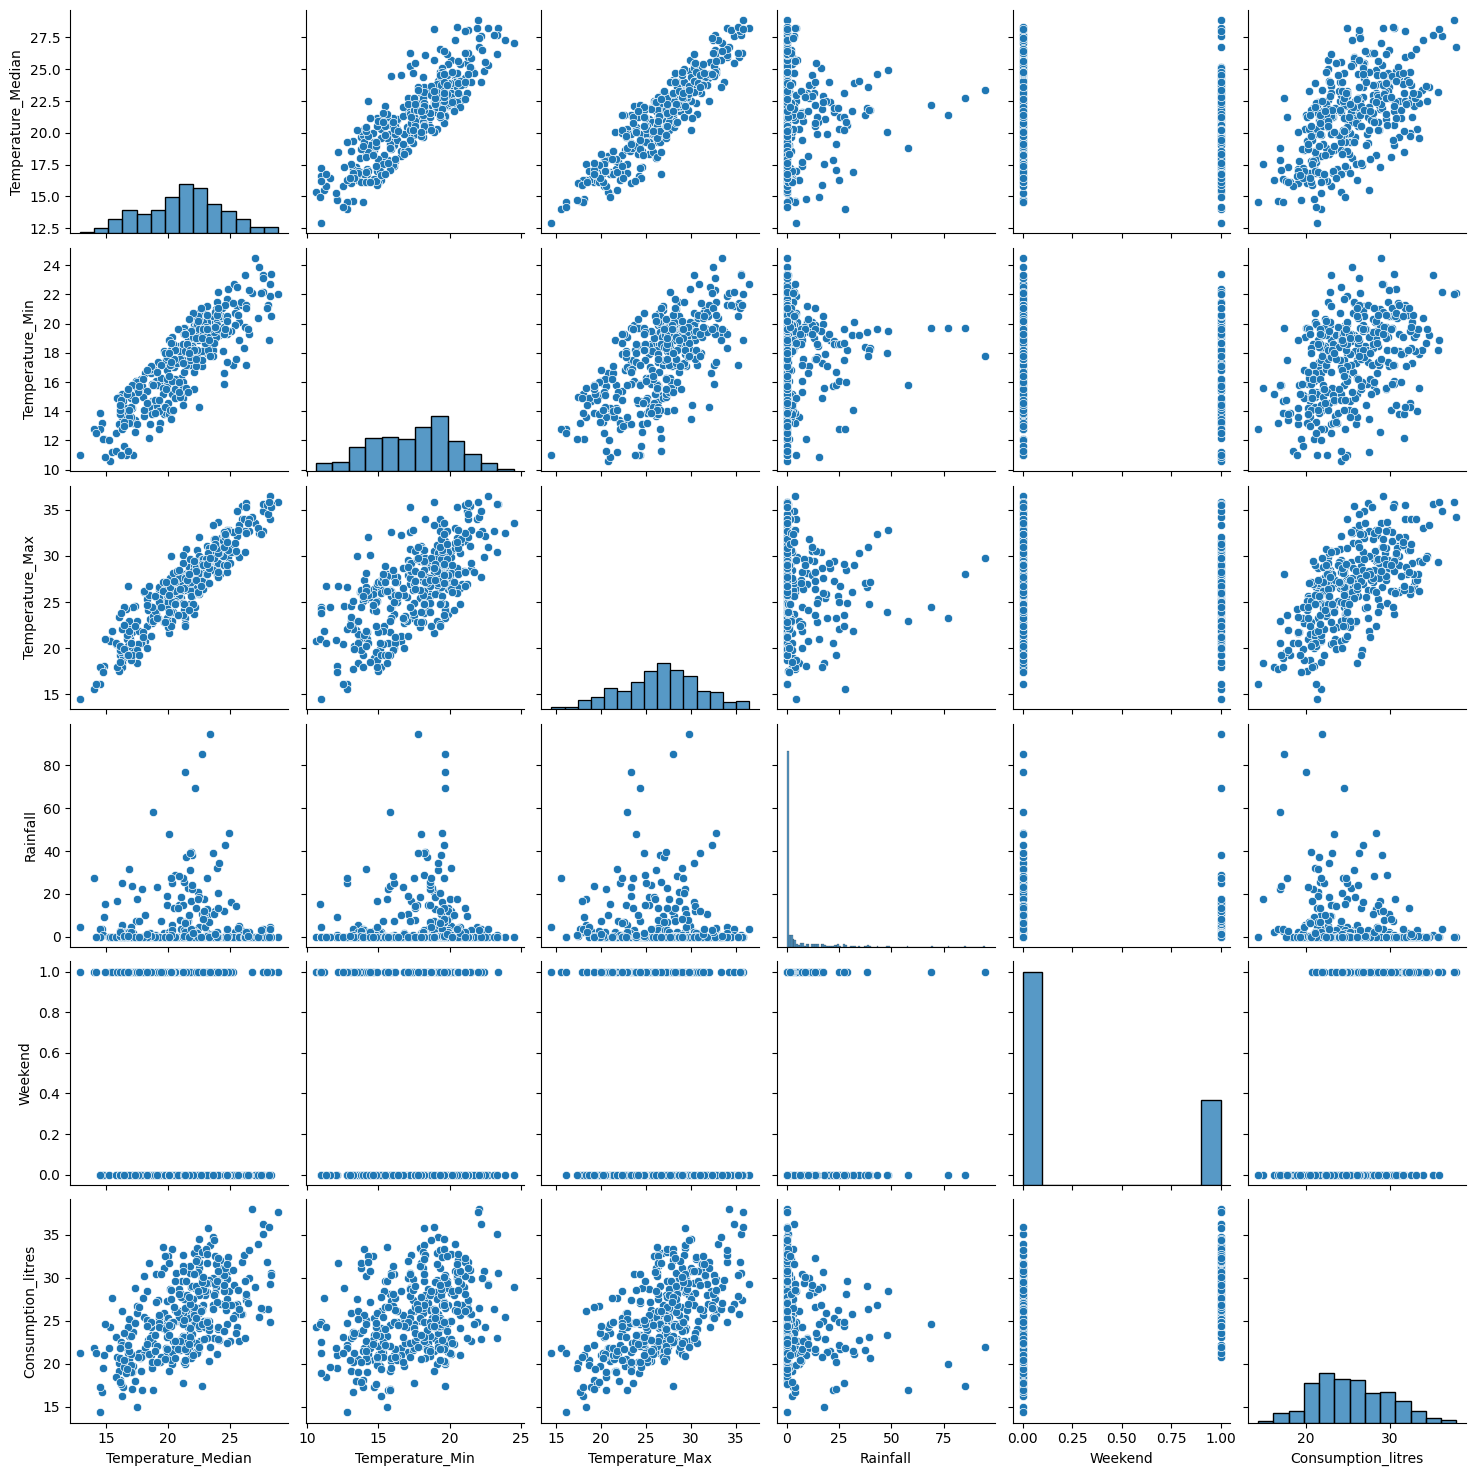

In [31]:
# Importing seaborn for pair plot
import seaborn as sns

# Select relevant variables for pair plot (excluding 'Date' and response variable 'Consumption_litres')
relevant_data = beer_data.drop(columns=['Date'])

# Plot the pair plot
sns.pairplot(relevant_data)
plt.show()


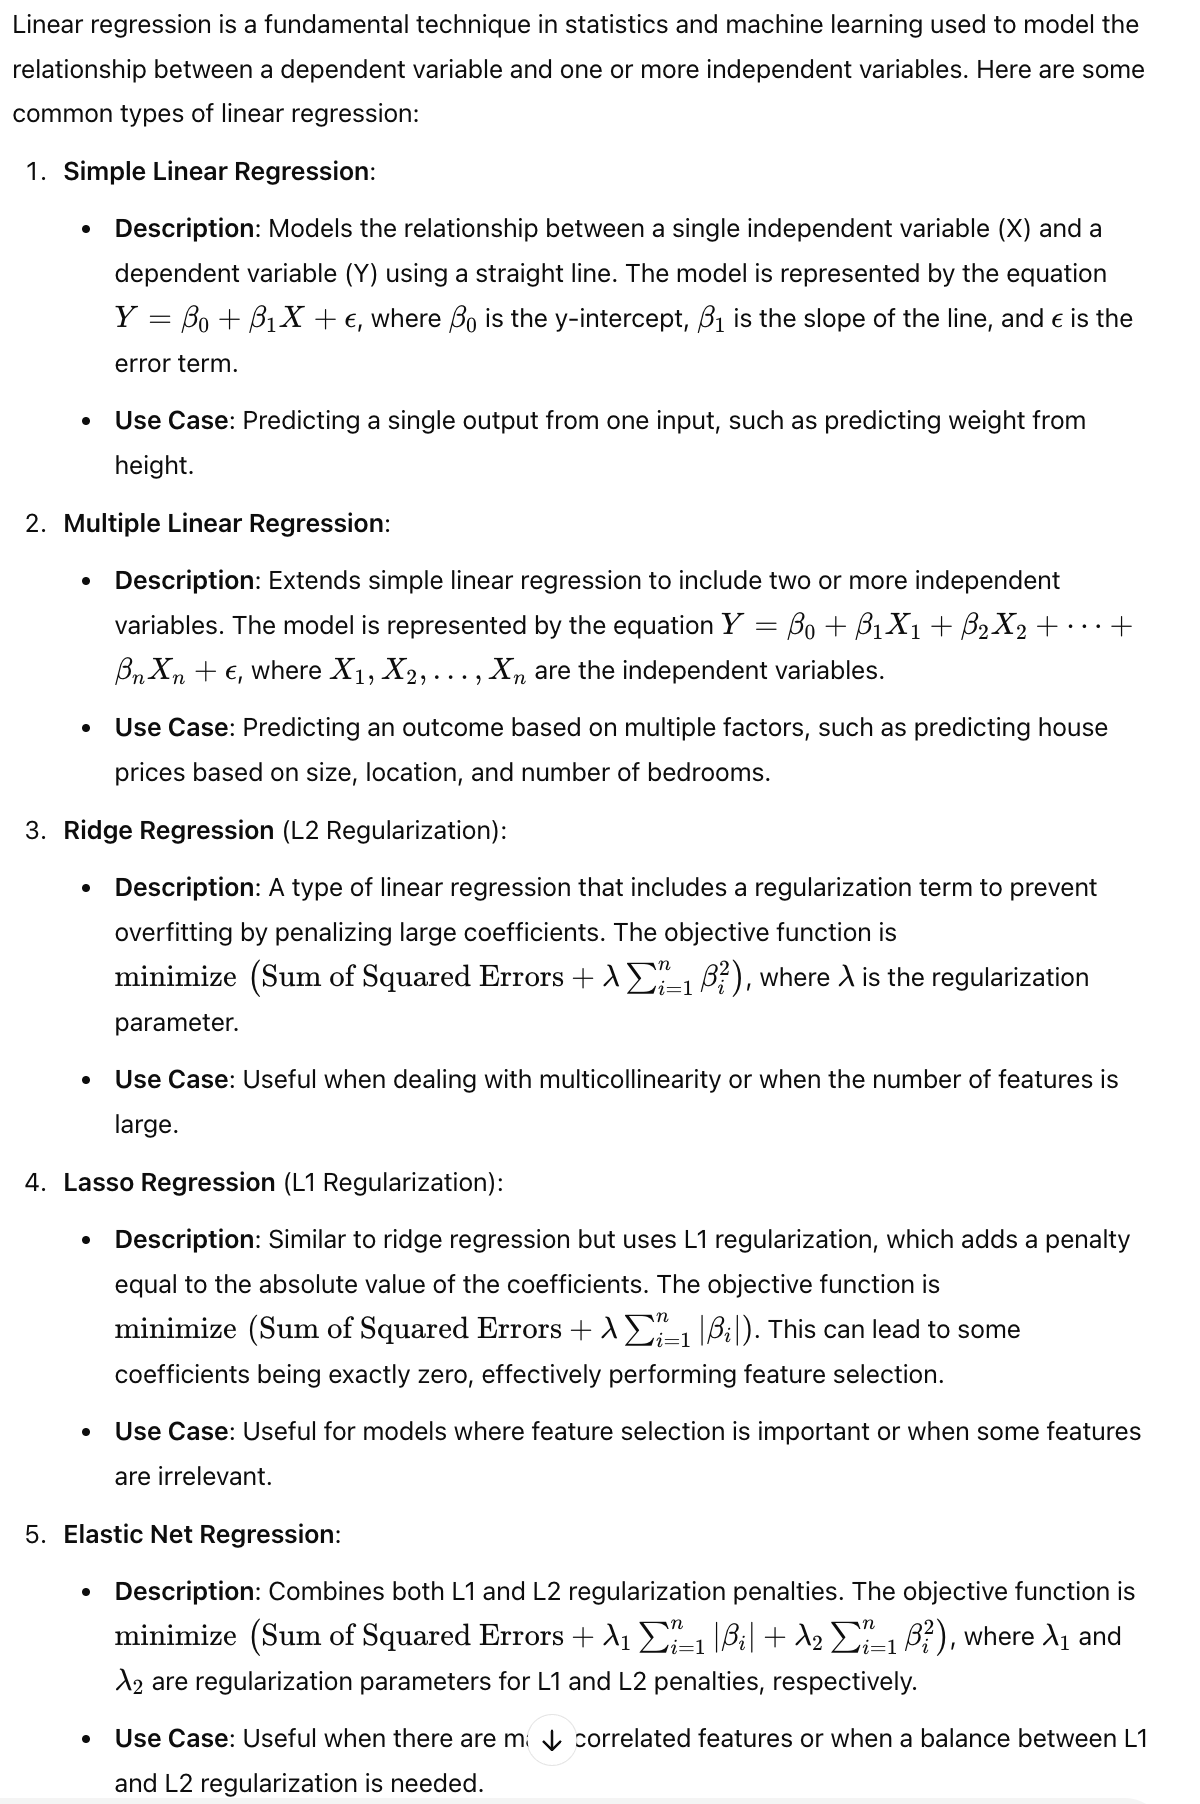

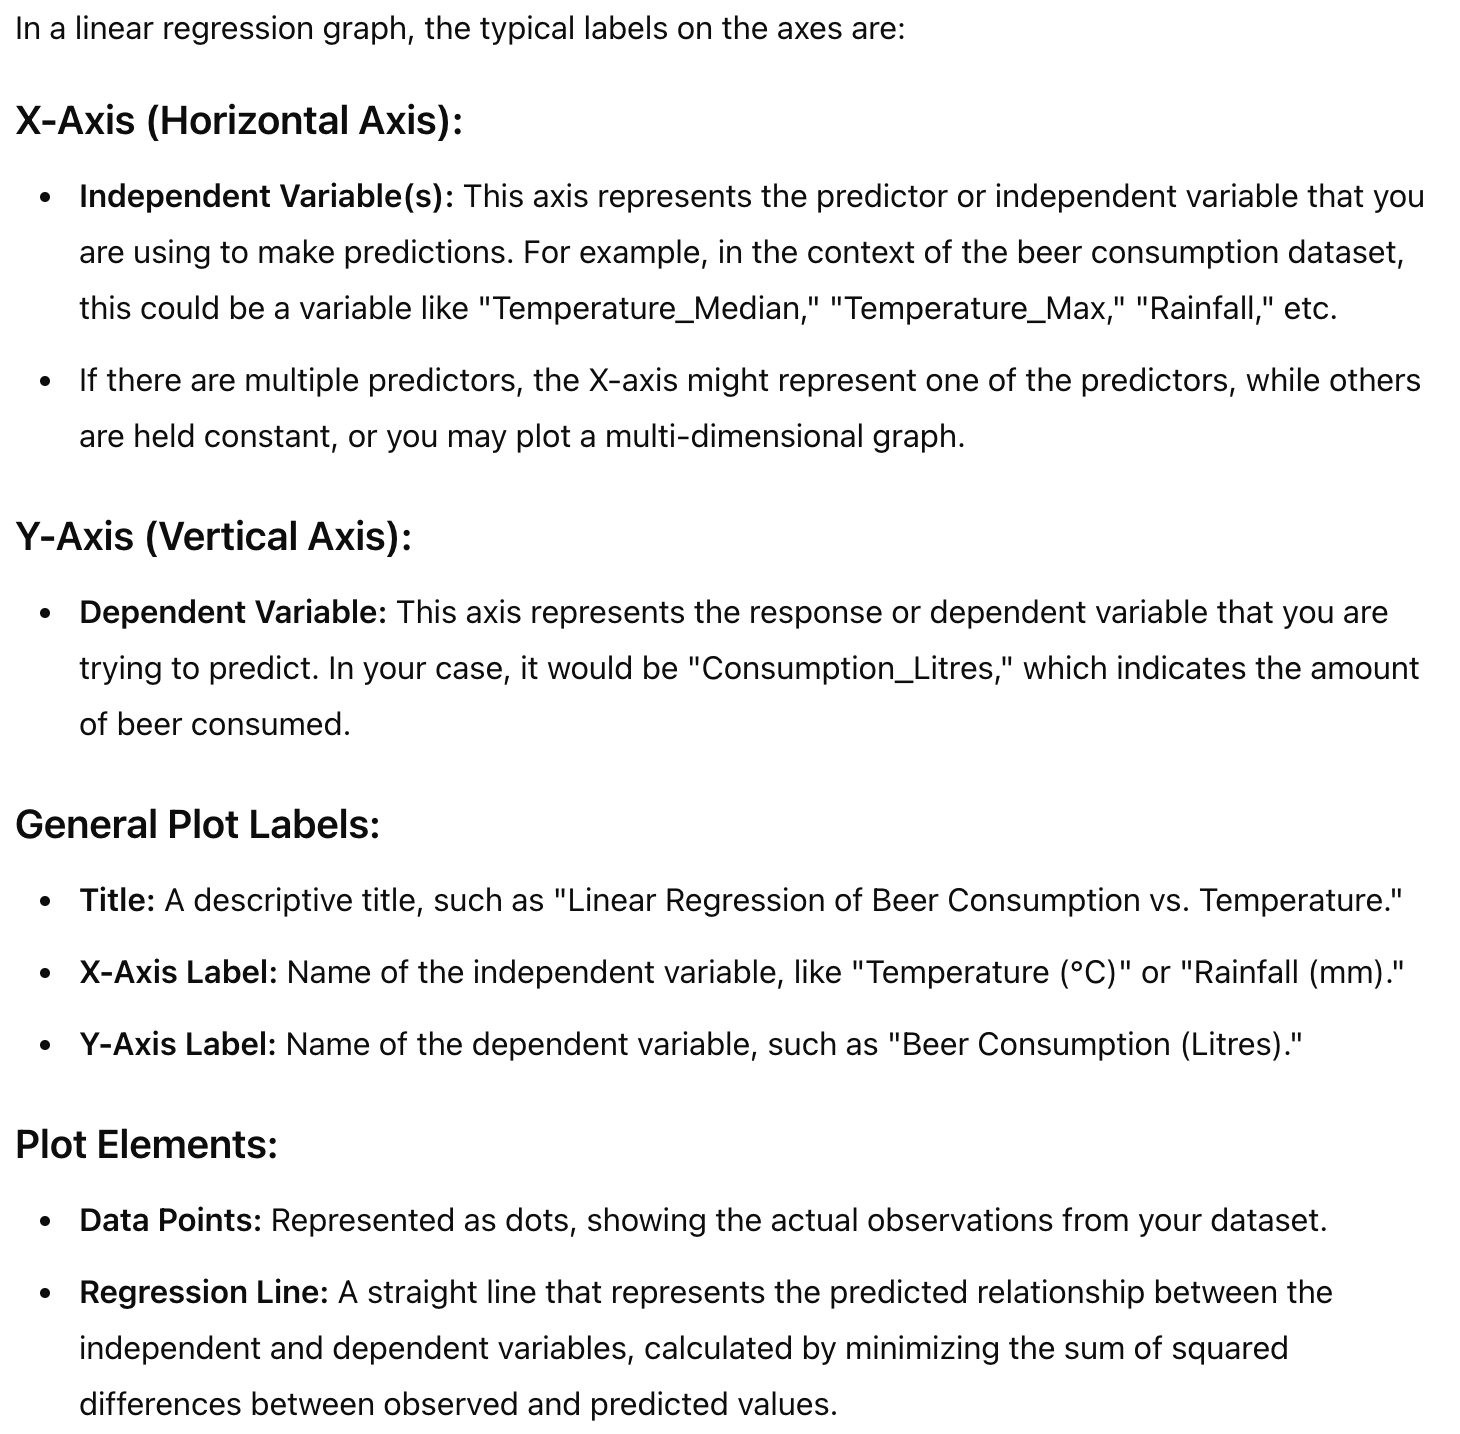

# Simple Linear Regression

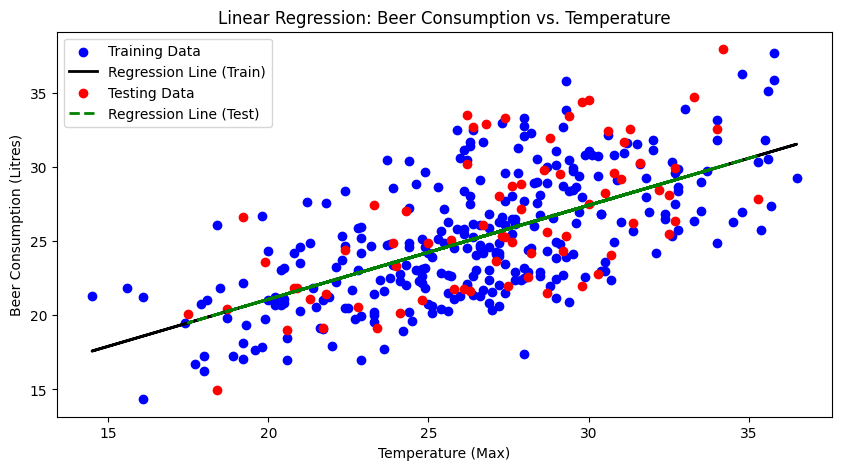

In [32]:
#use the pre-proceessed df

# Assume 'Temperature_Max' is your independent variable and 'Consumption_Litres' is your dependent variable
X = b_data[['Temperature_Max']]  # Predictor variable(s)
y = b_data['Consumption_litres']    # Response variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the Training Data
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label='Regression Line (Train)')

# Plot the Testing Data
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_test, y_test_pred, color='green', linewidth=2, linestyle='--', label='Regression Line (Test)')

# Add plot labels and title
plt.xlabel('Temperature (Max)')
plt.ylabel('Beer Consumption (Litres)')
plt.title('Linear Regression: Beer Consumption vs. Temperature')
plt.legend()

# Show the plot
plt.show()


# Bias Variance Trade off

 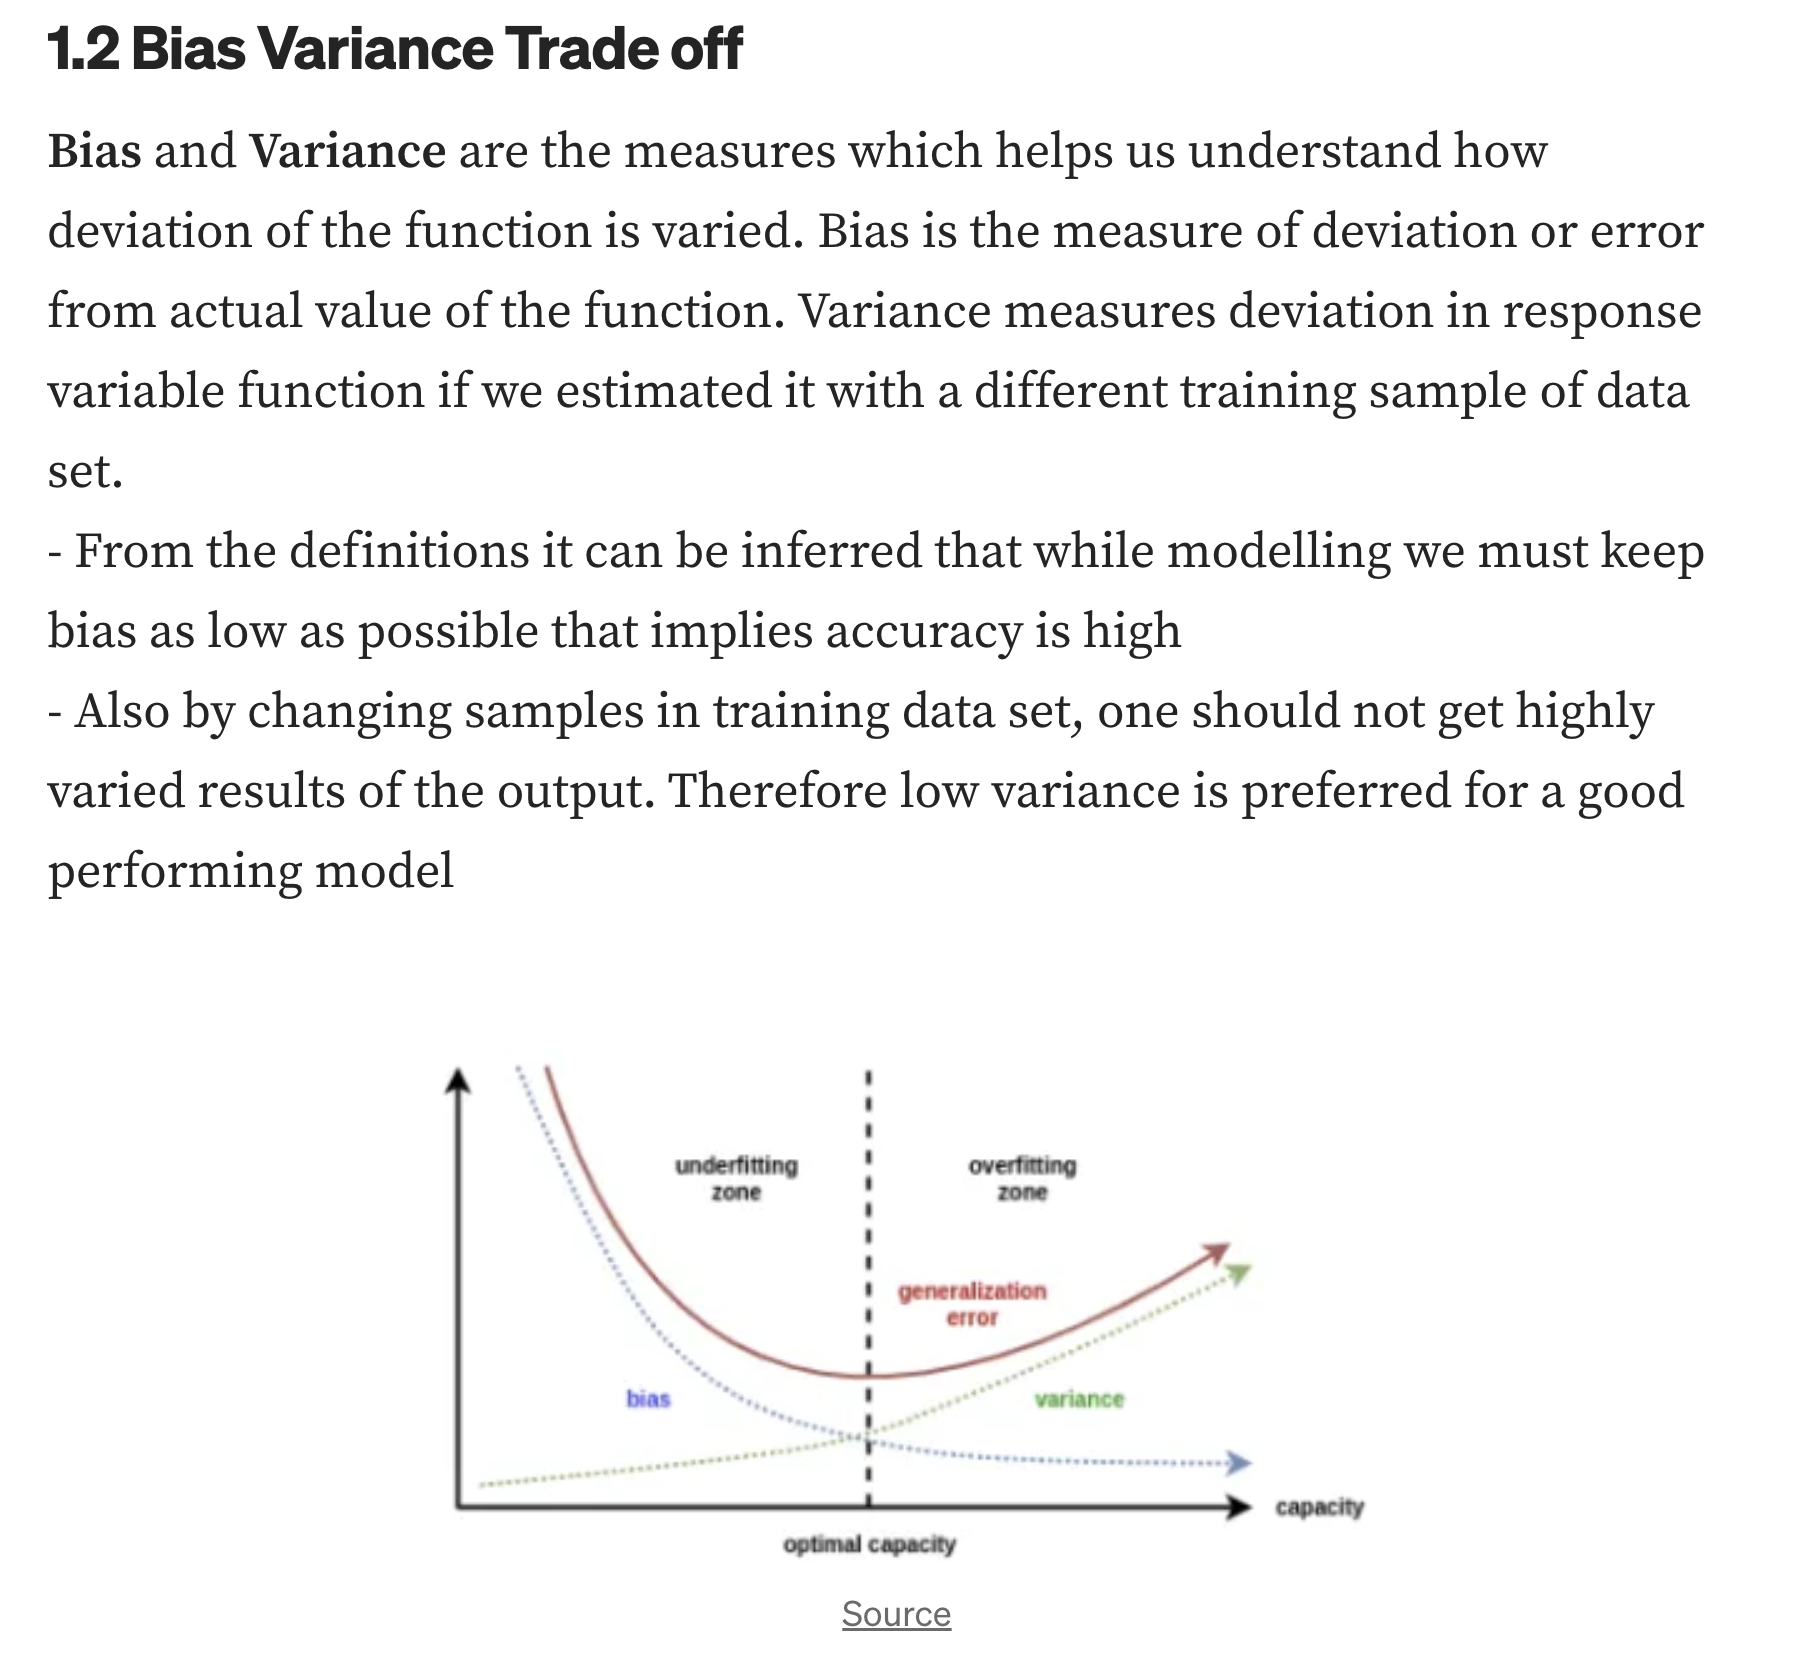

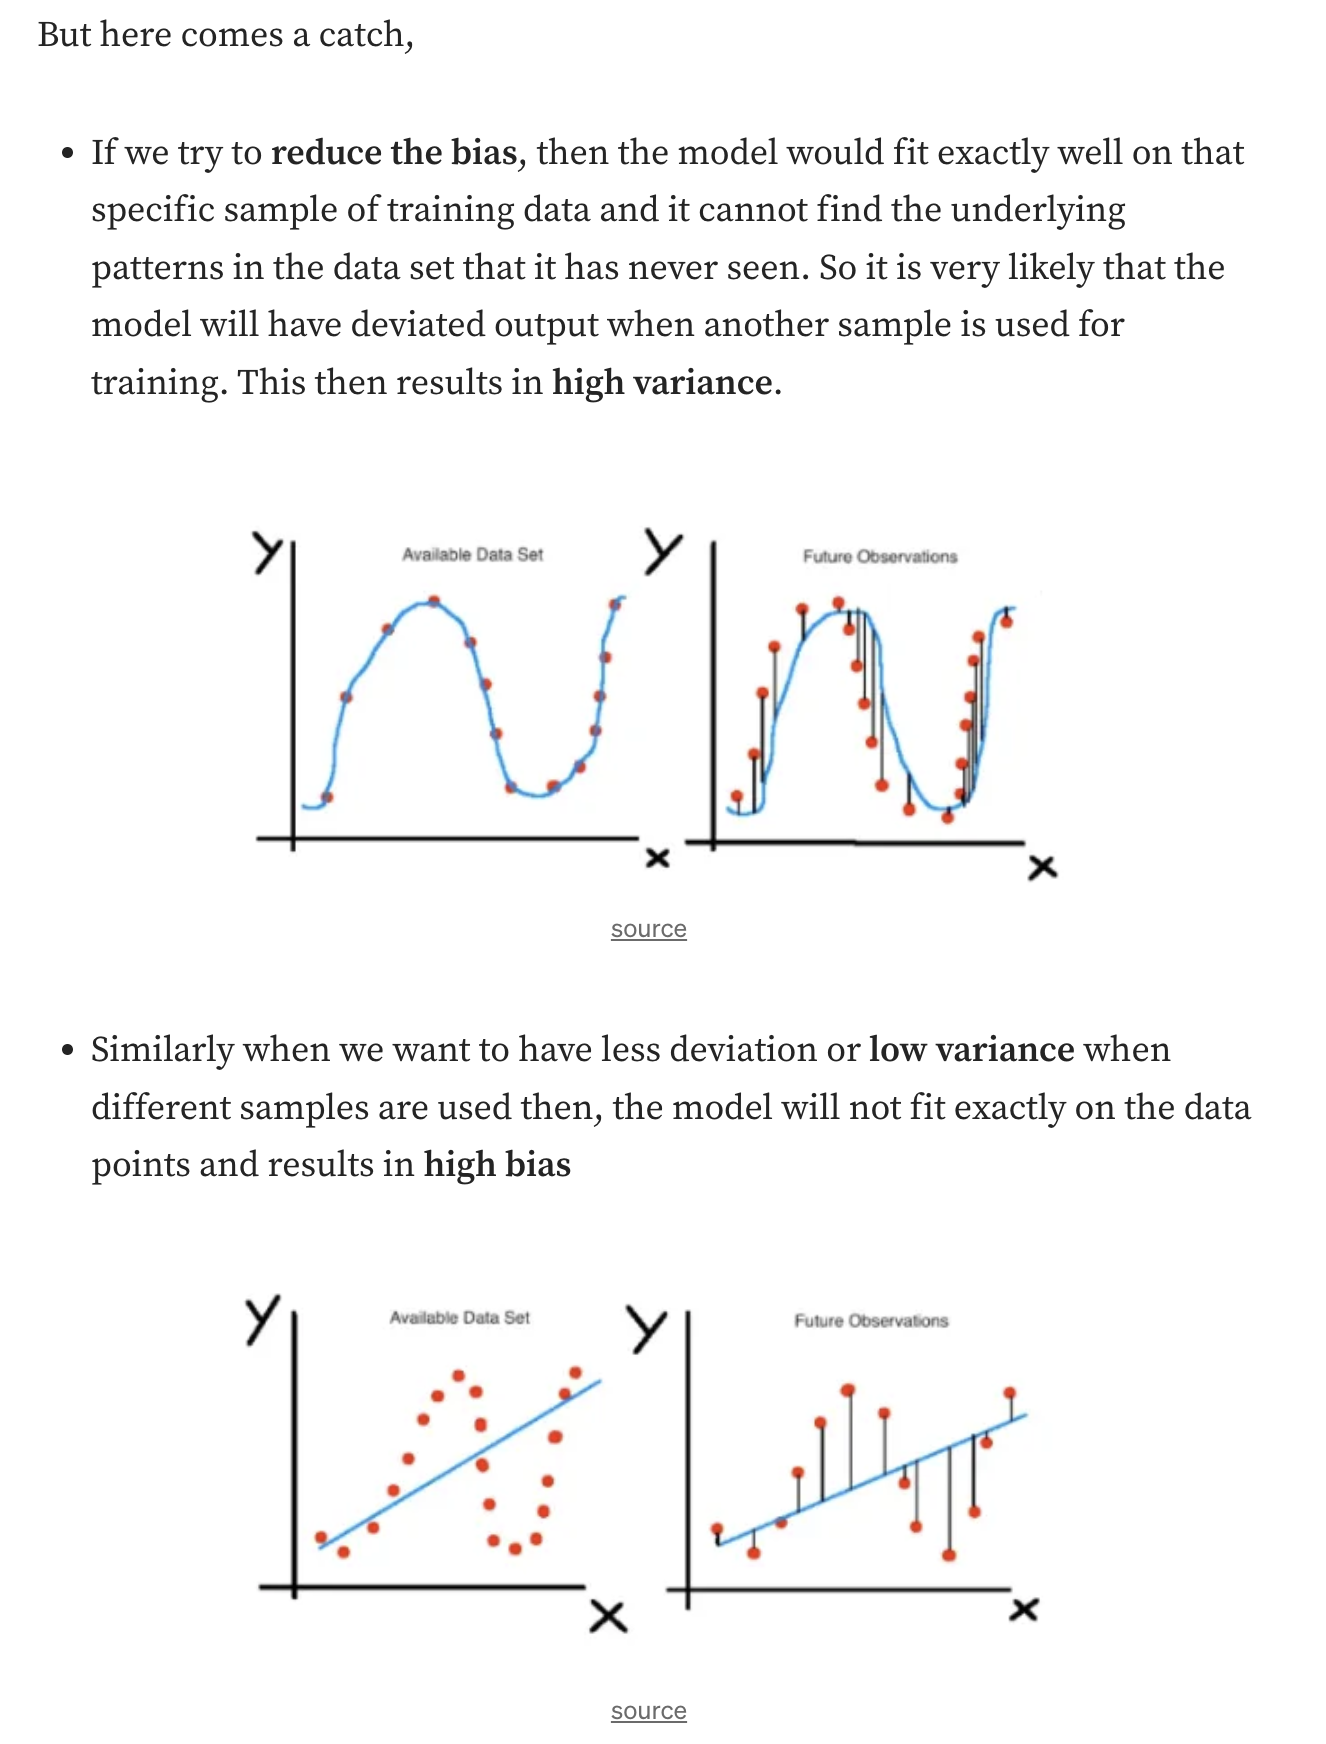

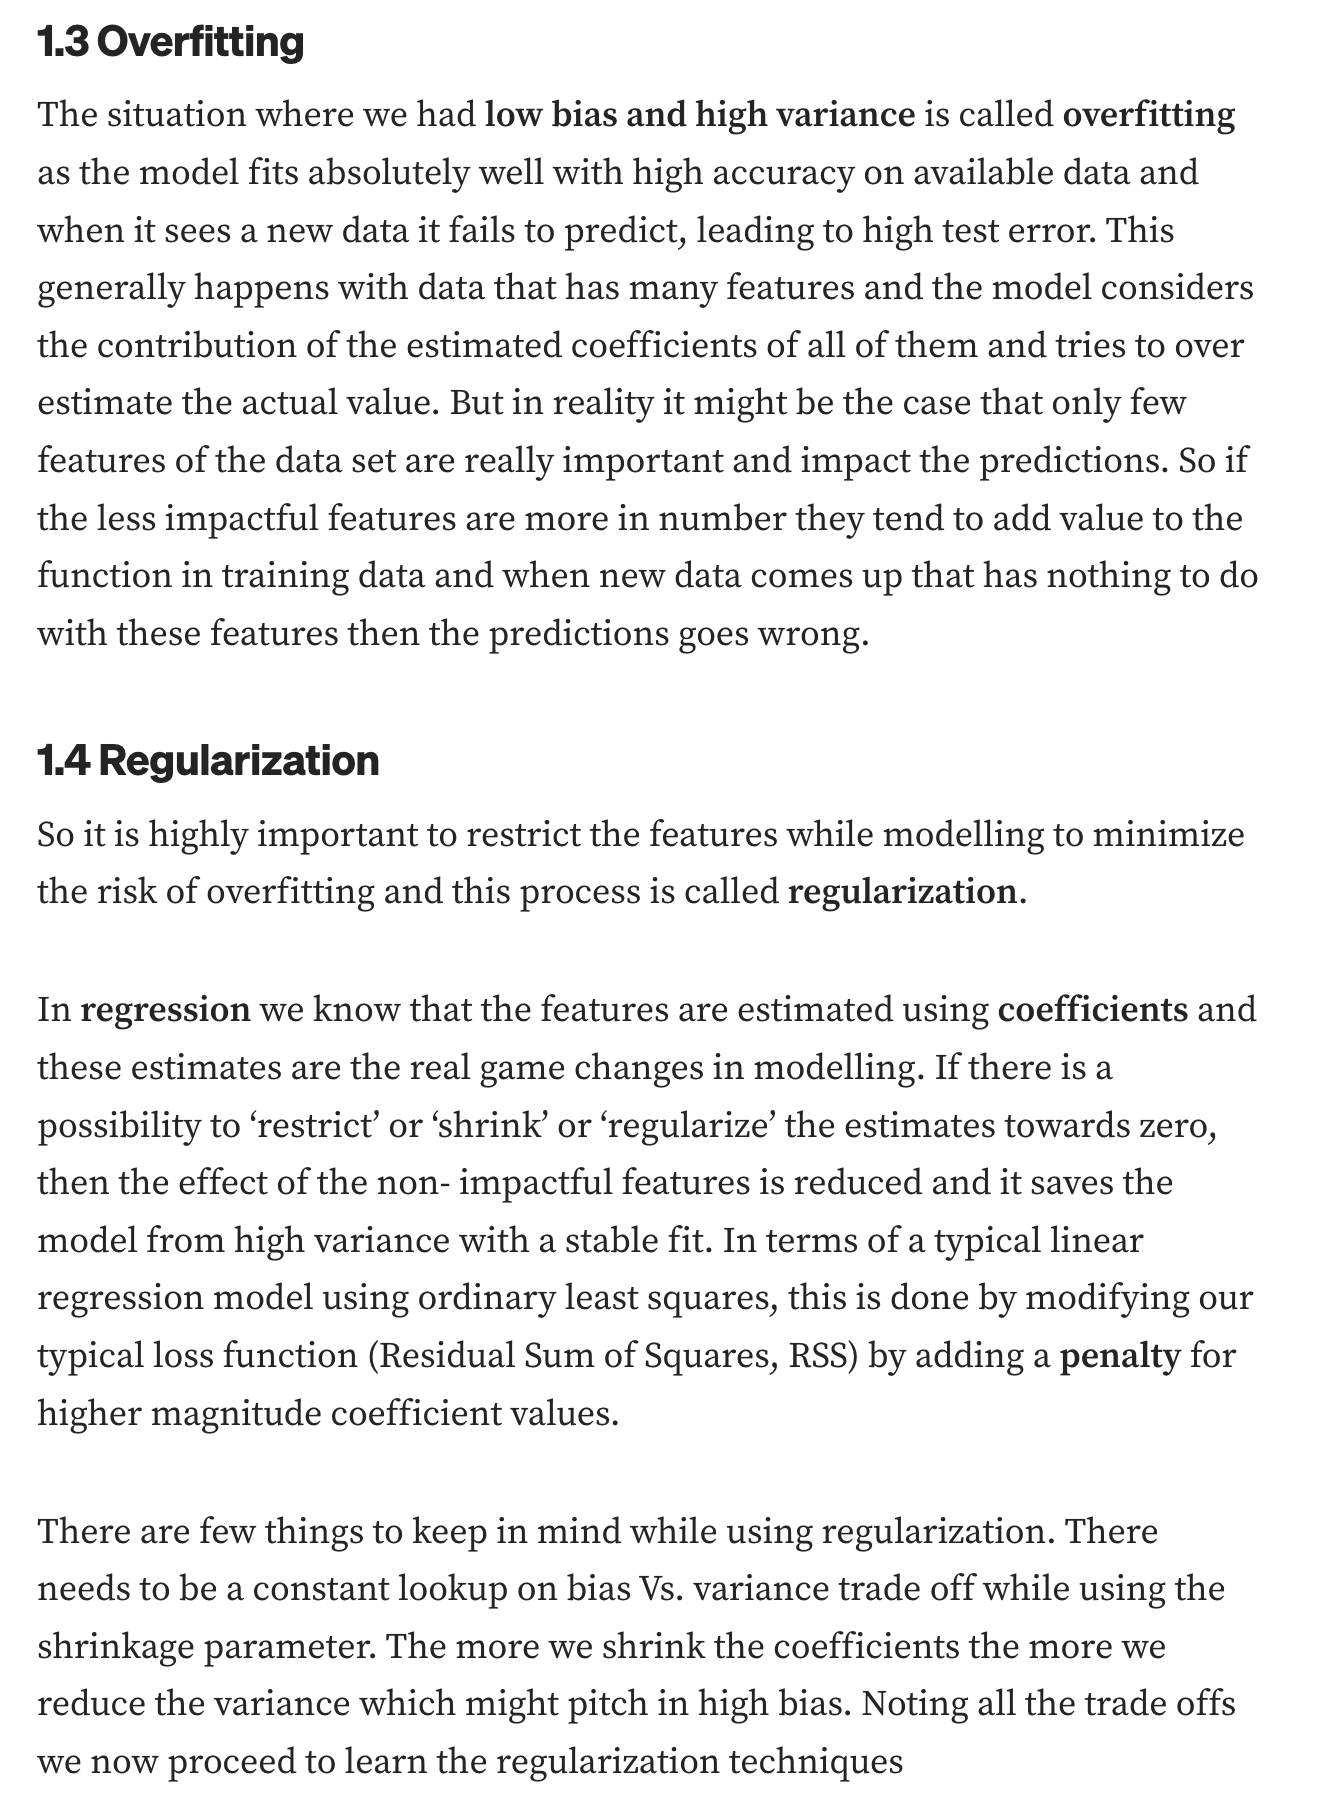

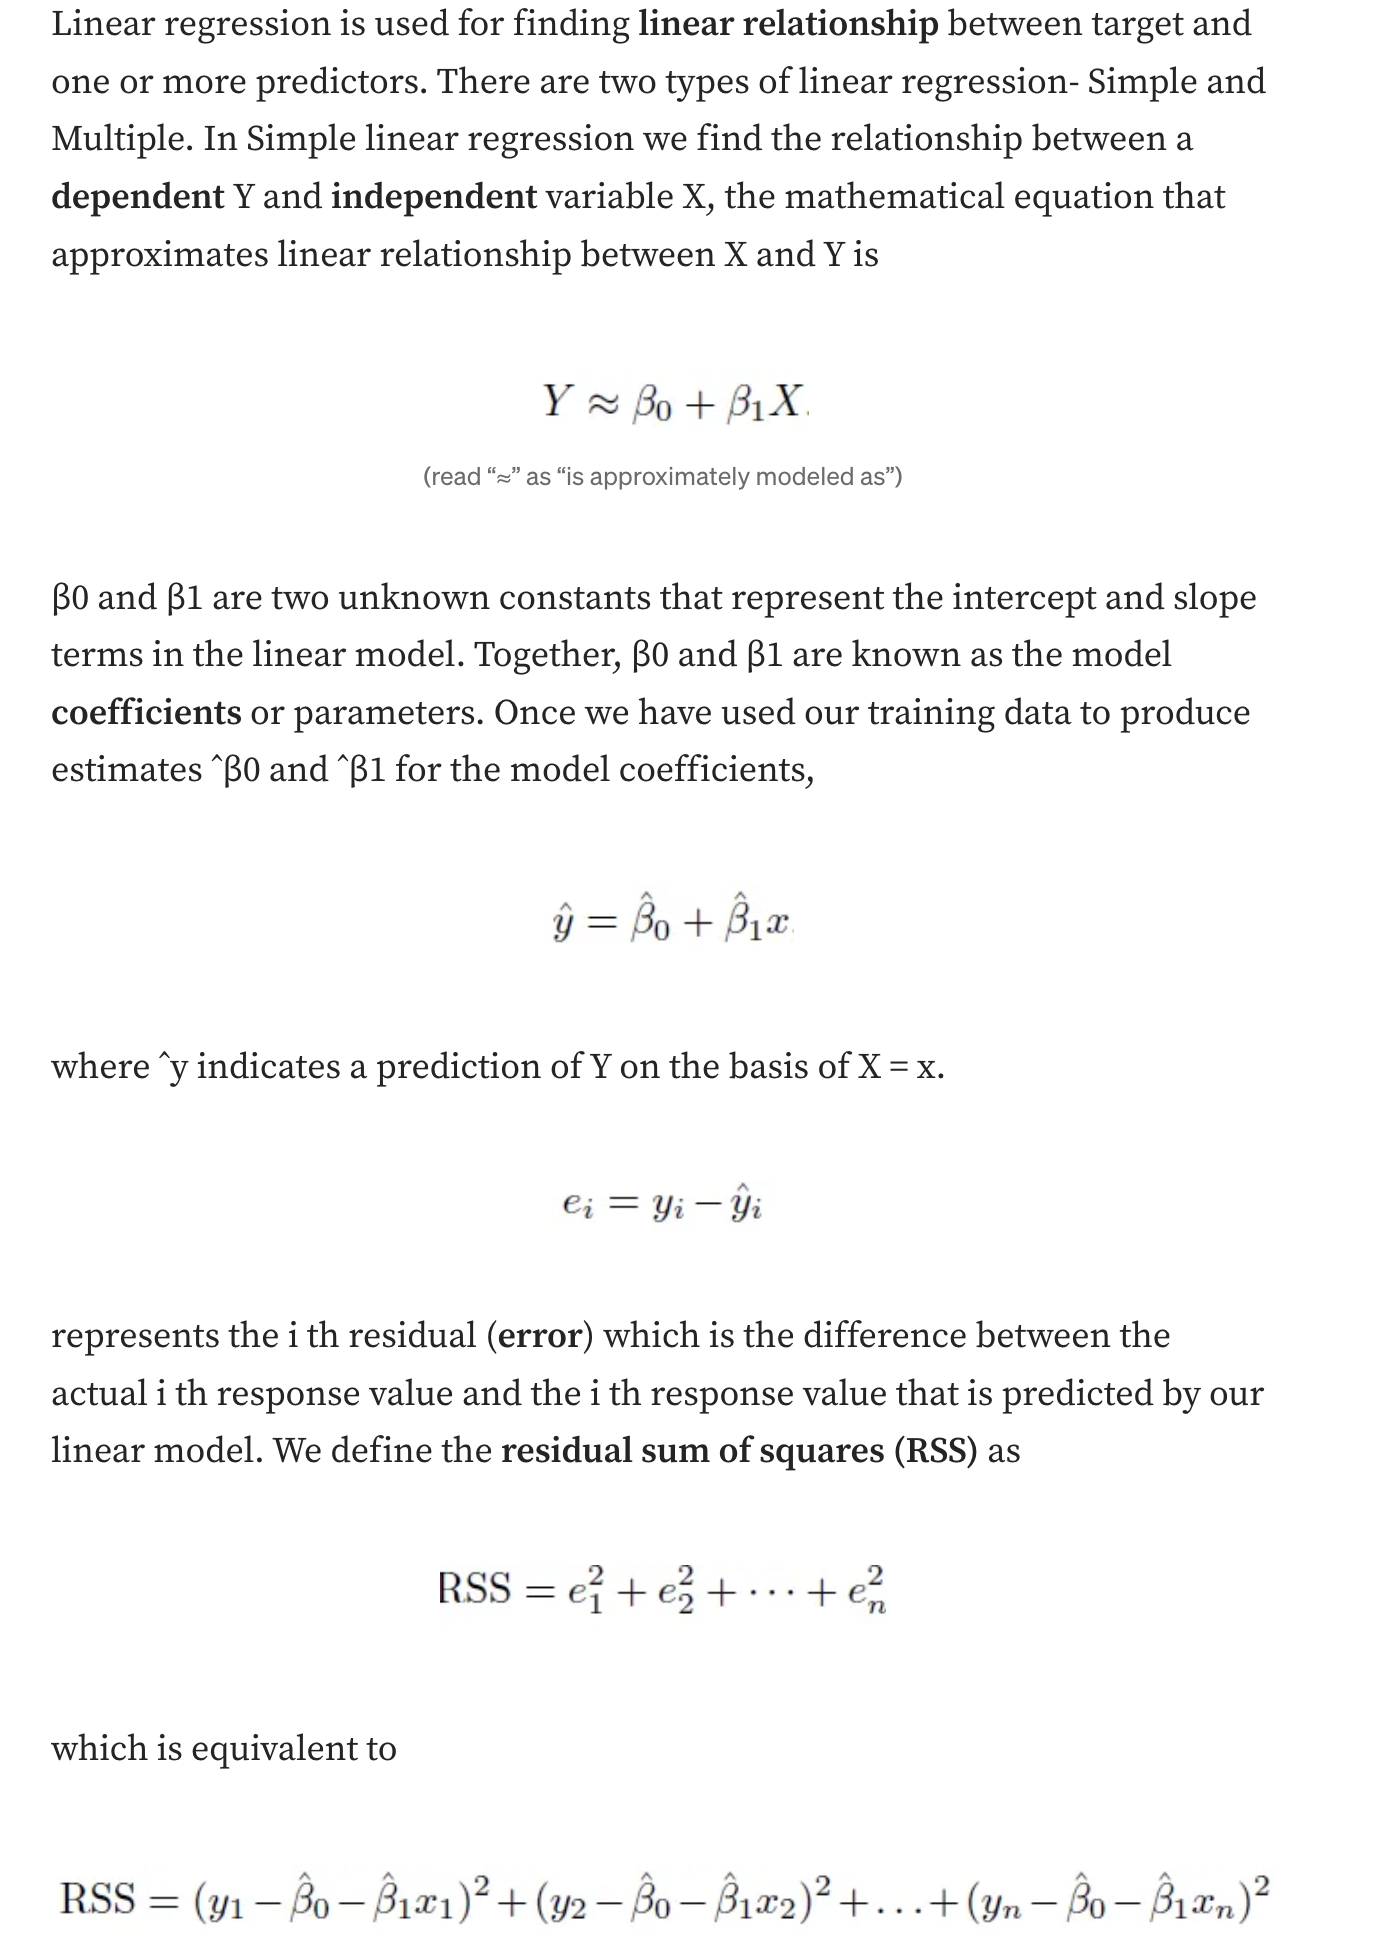

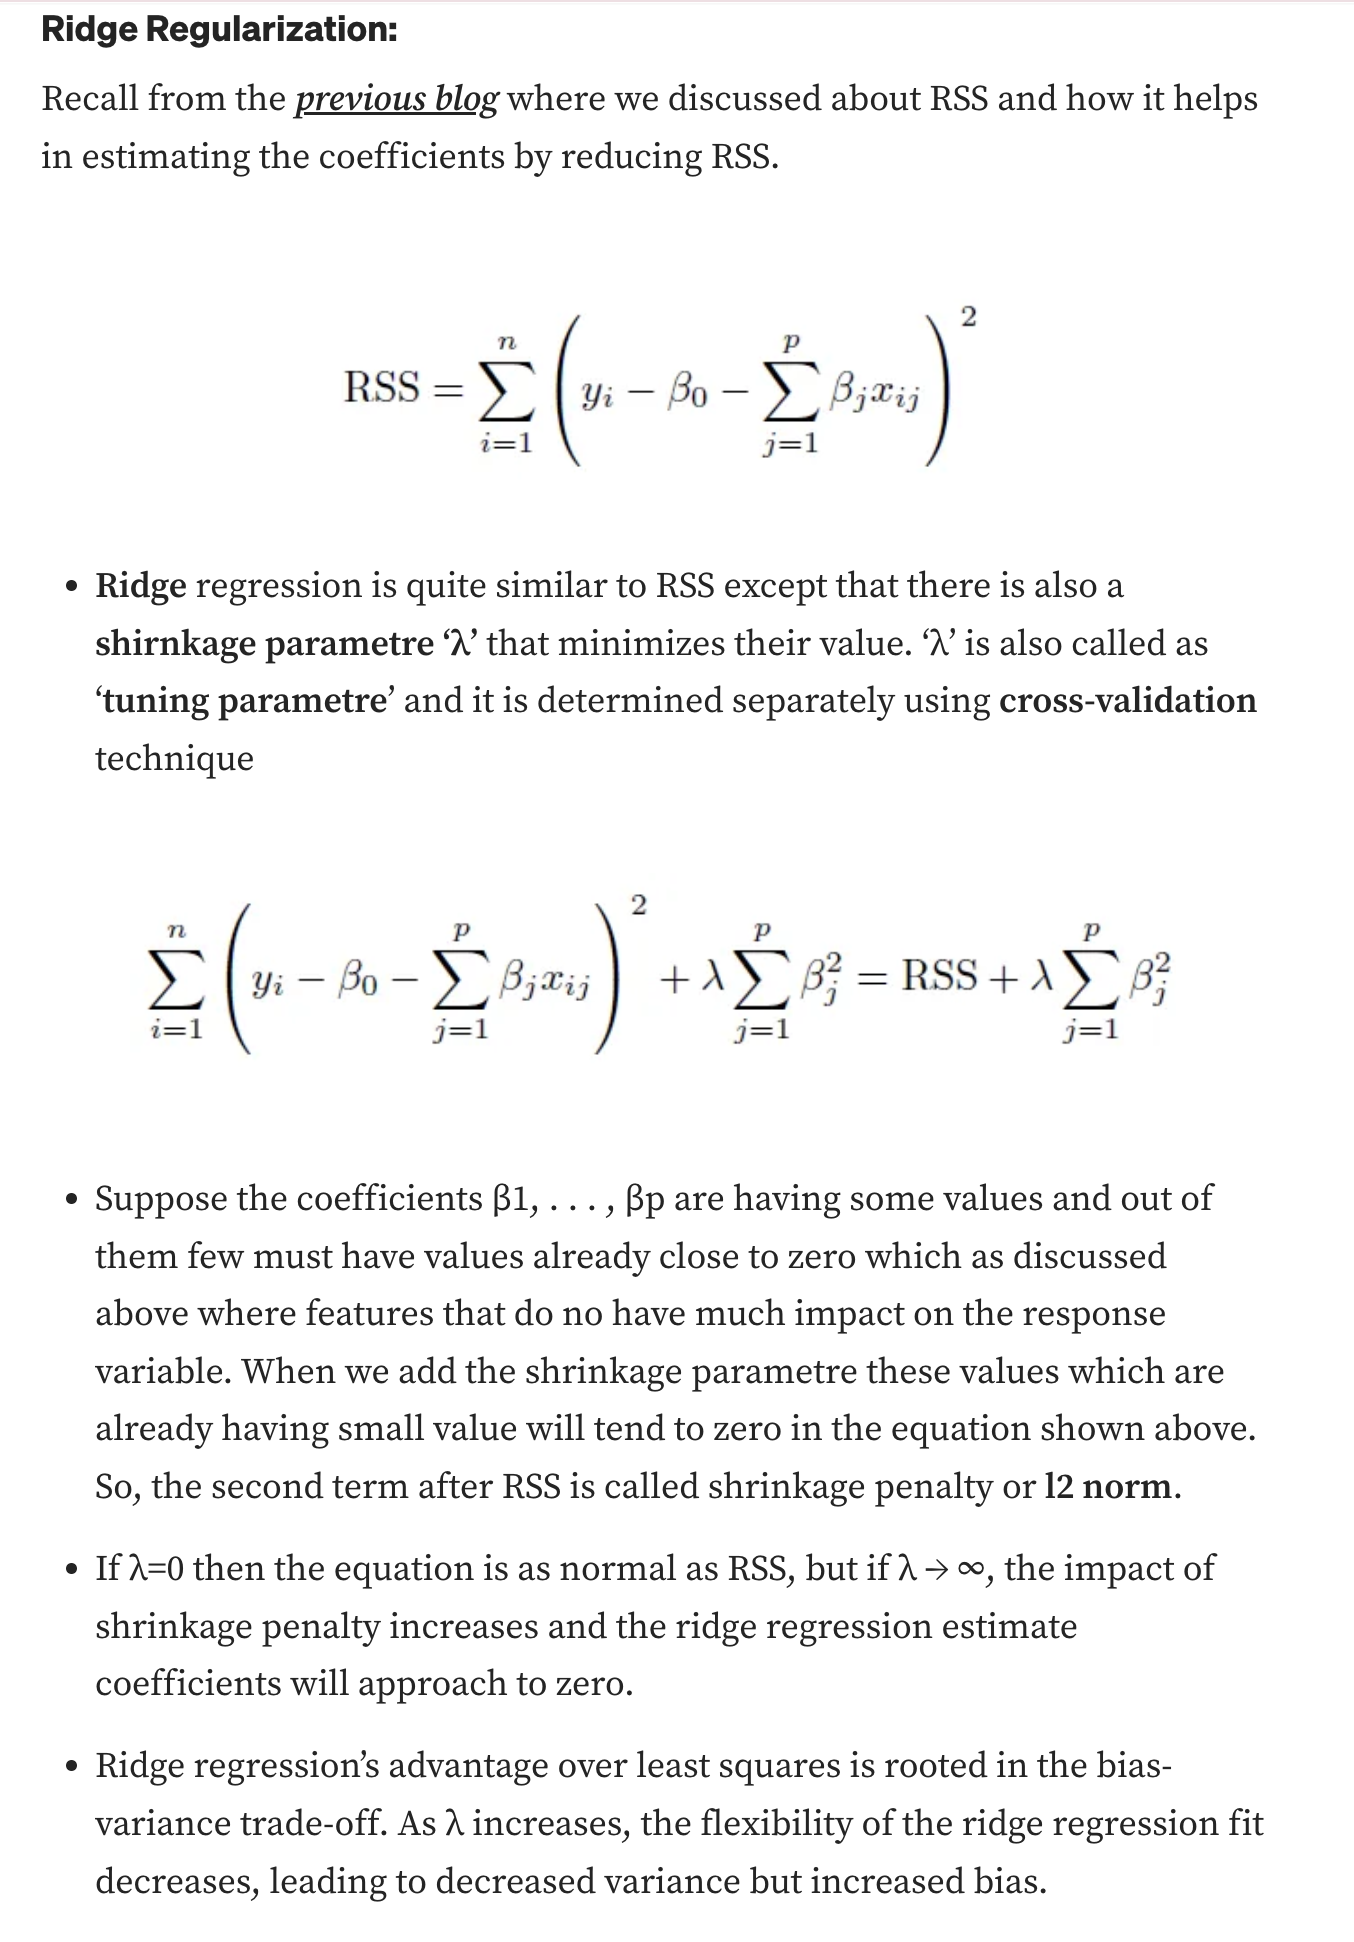

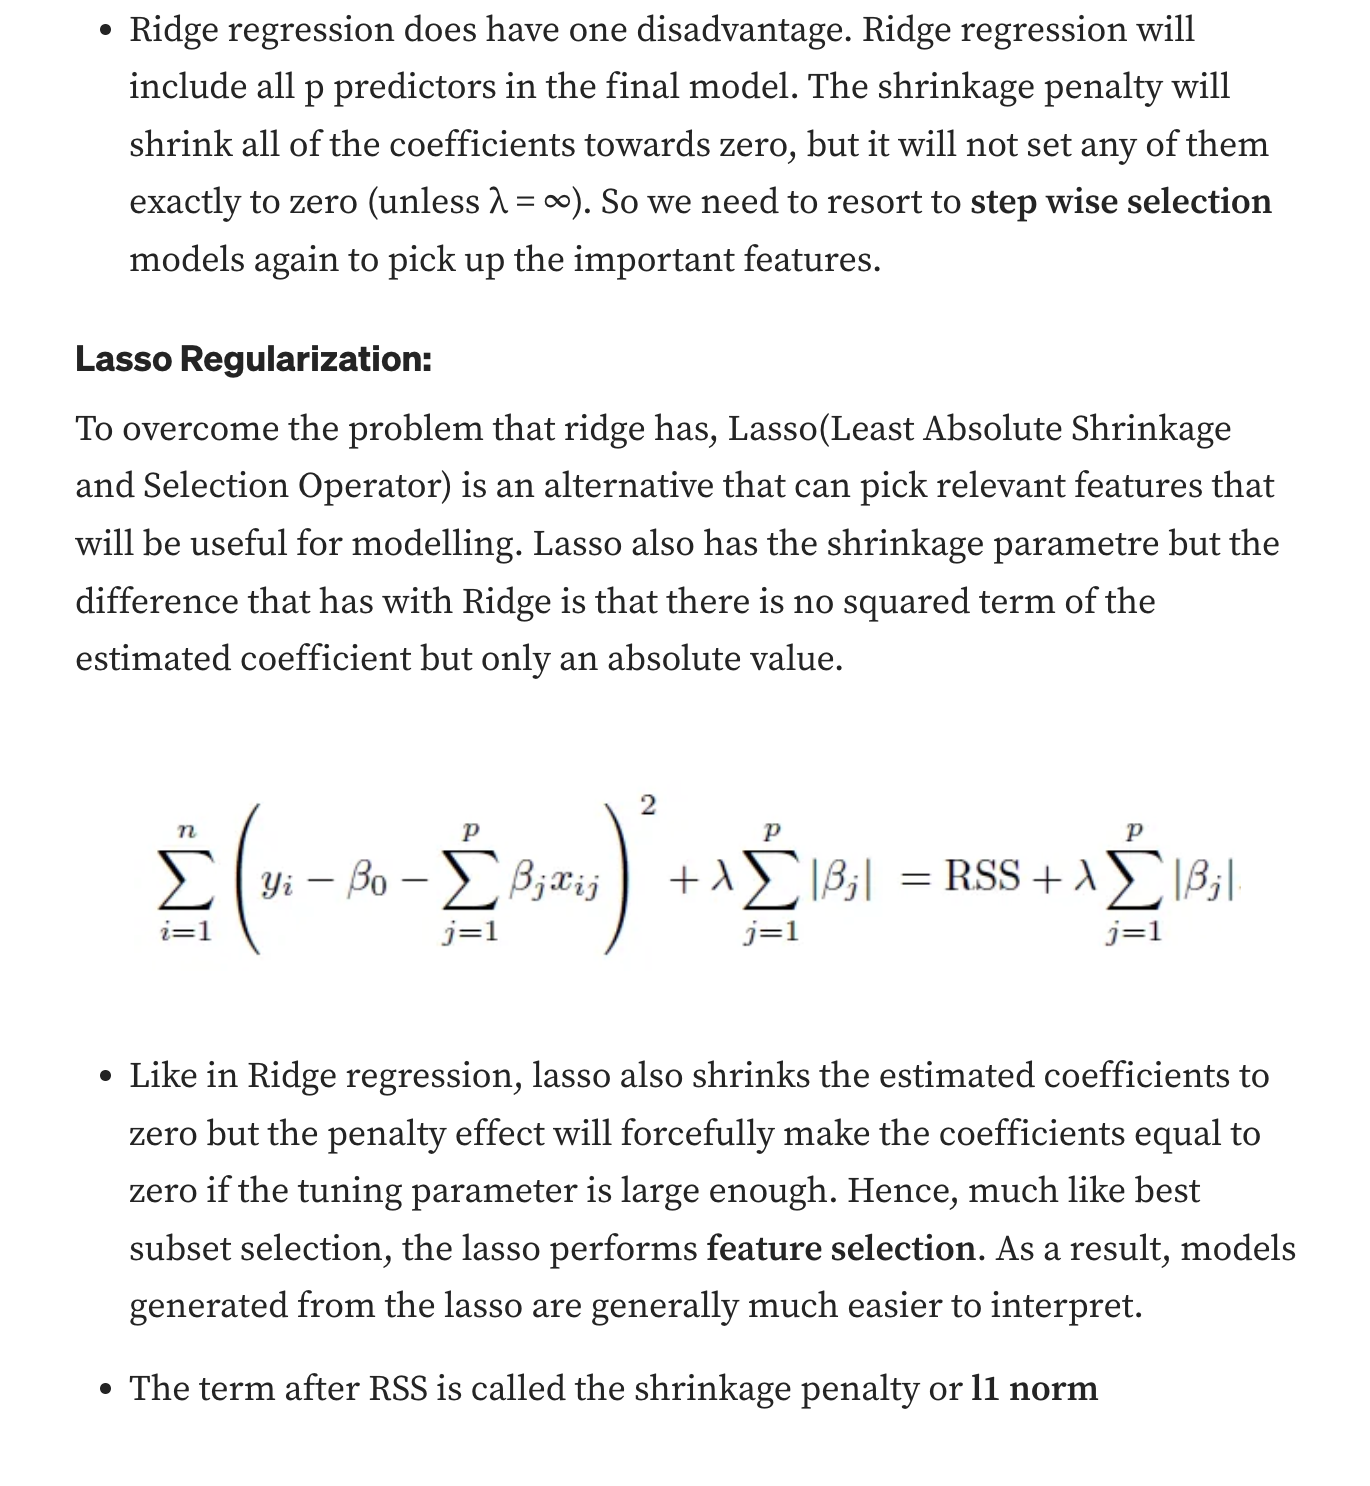

# LASSO and Ridge regression

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

# Define X and y
X = blr_data.drop(columns=['Date', 'Consumption_litres'])  # All columns except 'Date' and 'Consumption_litres'
y = blr_data['Consumption_litres']  # Response variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value for regularization strength
ridge_model.fit(X_train, y_train)

# Predictions for Ridge Regression
y_train_ridge_pred = ridge_model.predict(X_train)
y_test_ridge_pred = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value for regularization strength
lasso_model.fit(X_train, y_train)

# Predictions for Lasso Regression
y_train_lasso_pred = lasso_model.predict(X_train)
y_test_lasso_pred = lasso_model.predict(X_test)

# Calculate performance metrics for Ridge Regression
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_ridge_pred))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_ridge_pred))
ridge_train_r2 = r2_score(y_train, y_train_ridge_pred)
ridge_test_r2 = r2_score(y_test, y_test_ridge_pred)

# Print results
print("Ridge Regression Performance:")
print(f"Training set RMSE: {ridge_train_rmse:.4f}")
print(f"Training set R2: {ridge_train_r2:.4f}")
print(f"Testing set RMSE: {ridge_test_rmse:.4f}")
print(f"Testing set R2: {ridge_test_r2:.4f}")


# Calculate performance metrics for Lasso Regression
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_lasso_pred))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_lasso_pred))
lasso_train_r2 = r2_score(y_train, y_train_lasso_pred)
lasso_test_r2 = r2_score(y_test, y_test_lasso_pred)

print("\nLasso Regression Performance:")
print(f"Training set RMSE: {lasso_train_rmse:.4f}")
print(f"Training set R2: {lasso_train_r2:.4f}")
print(f"Testing set RMSE: {lasso_test_rmse:.4f}")
print(f"Testing set R2: {lasso_test_r2:.4f}")


Ridge Regression Performance:
Training set RMSE: 2.3039
Training set R2: 0.7103
Testing set RMSE: 2.3890
Testing set R2: 0.7424

Lasso Regression Performance:
Training set RMSE: 2.3163
Training set R2: 0.7072
Testing set RMSE: 2.4025
Testing set R2: 0.7395


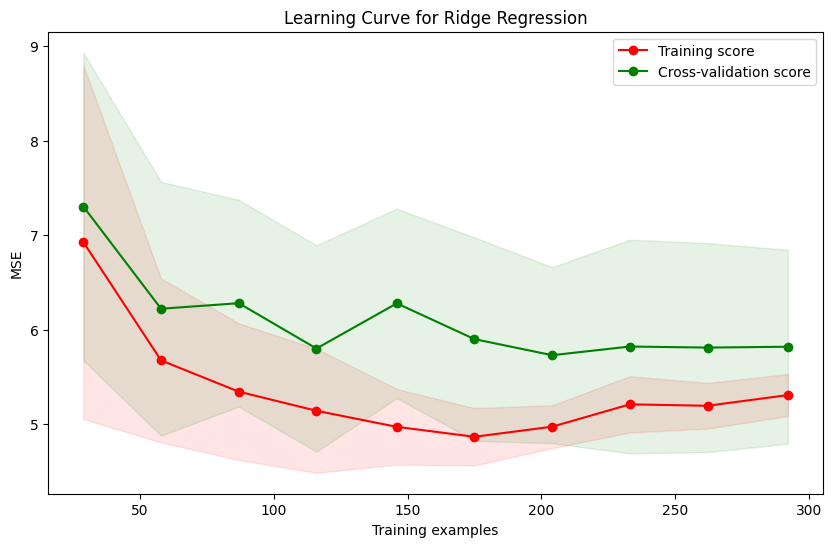

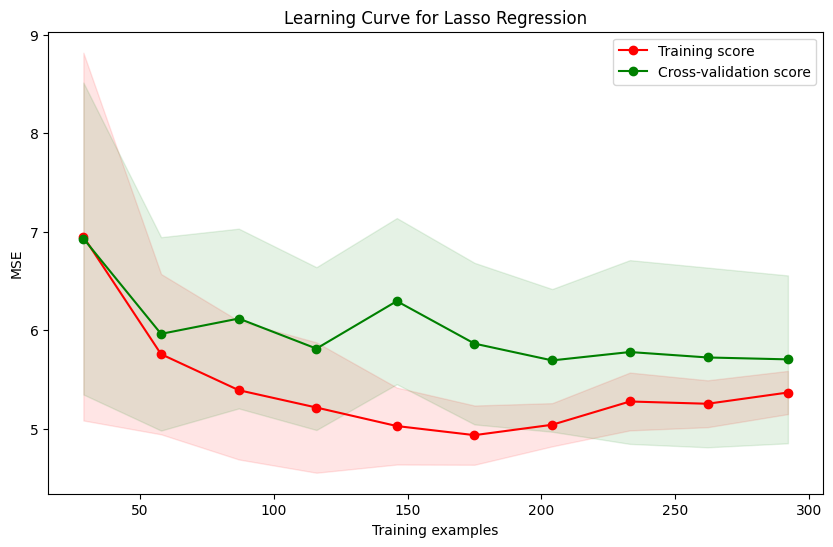

In [34]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
# Define function to plot learning curve
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

    # Mean and standard deviation of train and test scores
    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)

    # Plotting learning curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("MSE")
    
    # Plot the average training and testing errors
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-validation score")
    
    # Plot the variance around the mean for both curves
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

    plt.legend(loc="best")
    plt.show()

# Plot learning curve for Ridge Regression
ridge_model = Ridge(alpha=1.0)
plot_learning_curve(ridge_model, X, y, title="Learning Curve for Ridge Regression")

# Plot learning curve for Lasso Regression
lasso_model = Lasso(alpha=0.1)
plot_learning_curve(lasso_model, X, y, title="Learning Curve for Lasso Regression")